![imagen.png](attachment:imagen.png)

<a href="https://colab.research.google.com/github/joanby/python-ml-course/blob/master/notebooks/T10%20-%201%20-%20Analisis%20de%20Componentes%20Principales-Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Consignas:
# Analizar y resolver
# # Subir a repositorio de Github, con al menos un pull request, y devolver el link

# Hacer un fork de este repositorio y trabajar sobre ese archivo


1- Generar un set de datos, con al menos 4 predictores

2- Dado el siguiente código indicar que tipo de problema instanta resolver. 

3- Evaluar los resultados.

4- Agregar otro algoritmo para resolver sobre el mismo set de datos.


#SVM

In [ ]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
# Preprocesado y modelado
# ==============================================================================
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Para generar los datos usaremos las funciones provistas en sklearn

sklearn.datasets: Datasets


In [ ]:
# Datos
# ==============================================================================
# https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data
#url = data
#datos = pd.read_csv(url)
#datos.head(3)


In [3]:

from sklearn.datasets import load_wine
data = load_wine()
data1 = pd.DataFrame(data= np.c_[data['target'], data['data']],
                     columns= ['target'] + data['feature_names'] )
datos = data1
datos

#data.target[[10, 80, 140]]

#list(data.target_names)
#['class_0', 'class_1', 'class_2']

,target,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,0.0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,0.0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,0.0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,0.0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,2.0,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,2.0,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,2.0,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,2.0,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


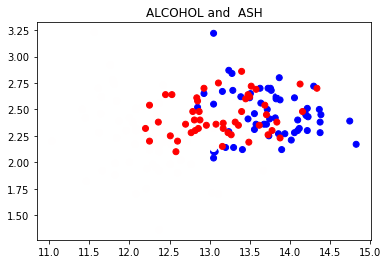

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(datos.alcohol, datos.ash, c=datos.target);
ax.set_title("ALCOHOL and  ASH");

In [ ]:
# División de los datos en train y test
# ==============================================================================
X = datos.drop(columns = 'target')
y = datos['target']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )



In [ ]:
X_train.shape

(142, 13)

In [ ]:
X_test.shape

(36, 13)

In [ ]:
#Busqueda en grilla de los mejores valores de los siguientes hiperparametros para SVM:
grilla_hiperparametros = {
    'support vector machine':{
        'model':SVC(),
        'params':{
            'C':[1, 0.75, 0.5, 0.25],
            'kernel':['linear']
        }
    }
}

score=[]

for model_name, mp in grilla_hiperparametros.items():

    clf = GridSearchCV(mp['model'],mp['params'], cv=3, return_train_score=False)
    clf.fit(X_train, y_train)

    score.append({
        'model':model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

In [ ]:
#Verificamos cual de los valores de los hiperparametros dio el mejor resultado
pd.DataFrame(score,columns=['model','best_score','best_params'])

,model,best_score,best_params
0,support vector machine,0.96513,"{'C': 1, 'kernel': 'linear'}"


In [ ]:
# Creación del modelo SVM lineal
# ==============================================================================
modelo = SVC(C = 1, kernel = 'linear', random_state=123)
modelo.fit(X_train, y_train)

#PONER CODIGO AQUI


SVC(C=1, kernel='linear', random_state=123)

In [ ]:
# Predicciones test
# ==============================================================================
predicciones = modelo.predict(X_test)
predicciones
#PONER CODIGO AQUI


array([1., 1., 1., 1., 2., 1., 2., 0., 0., 2., 2., 2., 0., 1., 1., 0., 0.,
       2., 2., 2., 0., 1., 1., 2., 1., 2., 1., 0., 0., 1., 0., 2., 1., 1.,
       1., 1.])

In [ ]:
# Accuracy de test del modelo 
# ==============================================================================
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
#PONER CODIGO AQUI

print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 91.66666666666666%


#REGRESION LOGISTICA


In [43]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')


##FORMA 1 DE HACER RL (SKlearn)

In [7]:
# Datos
# ==============================================================================
datos_RL = datos
datos_RL 

,target,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,0.0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,0.0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,0.0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,0.0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,2.0,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,2.0,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,2.0,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,2.0,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [33]:
#Dividimos los datos
X = datos_RL.drop(columns = 'target')
y = datos_RL['target']

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size= 0.2, random_state=42)

In [34]:
X_train.shape

(142, 13)

In [35]:
X_test.shape

(36, 13)

In [36]:
#Normalizamos el dataset
min_max_scaler = preprocessing.MinMaxScaler()
X_train_normalizado = min_max_scaler.fit_transform(X_train)
X_test_normalizado = min_max_scaler.fit_transform(X_test)

In [37]:
#Entrenamos el modelo
reglog=LogisticRegression()

reglog.max_iter=100
reglog.fit(X_train_normalizado, y_train)

LogisticRegression()

In [38]:
#Hacemos la predicción sobre los datos de testeo
predict = reglog.predict(X_test_normalizado)
predict

array([0., 0., 2., 0., 1., 0., 1., 2., 1., 2., 0., 2., 0., 2., 0., 1., 1.,
       1., 0., 1., 0., 1., 1., 2., 2., 2., 1., 1., 1., 0., 0., 1., 2., 0.,
       0., 0.])

In [41]:
#Verificamos que tan acertada fue la respuesta del modelo
accuracy = accuracy_score(y_test, predict)
accuracy
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 97.22222222222221%


In [44]:
#Imprimimos la matriz de confusión
conf = confusion_matrix(y_test, predict)
conf

array([[14,  0,  0],
       [ 0, 13,  1],
       [ 0,  0,  8]])

##FORMA 2 DE HACER RL (Statsmodels)

In [45]:
# Datos
# ==============================================================================
datos_RL_2 = datos
datos_RL_2

,target,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,0.0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,0.0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,0.0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,0.0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,2.0,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,2.0,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,2.0,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,2.0,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [61]:
# División de los datos en train y test
# ==============================================================================
X = datos_RL_2.drop(columns = 'target')
y = datos_RL_2['target']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [62]:
X_train.shape

(142, 13)

In [63]:
X_test.shape

(36, 13)

In [65]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.Logit(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

ValueError: ignored

In [50]:
# Predicciones con intervalo de confianza 
# ==============================================================================
predicciones = modelo.predict(exog = X_train)
# Clasificación predicha
# ==============================================================================
clasificacion = np.where(predicciones<0.5, 0, 1)
clasificacion

NameError: ignored

In [31]:
# Accuracy de test del modelo 
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
clasificacion = np.where(predicciones<0.5, 0, 1)
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = clasificacion,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")

NameError: ignored